In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('/content/survey lung cancer.csv')

print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  L

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [5]:
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 33


In [6]:
duplicated_rows = df[df.duplicated(keep=False)]
print("Duplicated Rows:")
display(duplicated_rows)

duplicated_stats = duplicated_rows.describe(include='all').T

print("\nStatistics for Duplicated Rows:")
display(duplicated_stats)

Duplicated Rows:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES



Statistics for Duplicated Rows:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,66,2,M,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,66.0,NaN,NaN,NaN,60.69697,6.346337,47.0,56.0,61.0,64.0,76.0
SMOKING,66.0,NaN,NaN,NaN,1.727273,0.448775,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,66.0,NaN,NaN,NaN,1.515152,0.5036,1.0,1.0,2.0,2.0,2.0
ANXIETY,66.0,NaN,NaN,NaN,1.515152,0.5036,1.0,1.0,2.0,2.0,2.0
PEER_PRESSURE,66.0,NaN,NaN,NaN,1.454545,0.501745,1.0,1.0,1.0,2.0,2.0
CHRONIC DISEASE,66.0,NaN,NaN,NaN,1.363636,0.484732,1.0,1.0,1.0,2.0,2.0
FATIGUE,66.0,NaN,NaN,NaN,1.757576,0.431834,1.0,2.0,2.0,2.0,2.0
ALLERGY,66.0,NaN,NaN,NaN,1.636364,0.484732,1.0,1.0,2.0,2.0,2.0
WHEEZING,66.0,NaN,NaN,NaN,1.636364,0.484732,1.0,1.0,2.0,2.0,2.0


In [7]:
print("Original shape of the dataset:", df.shape)
df.drop_duplicates(inplace=True)
print("New shape of the dataset after removing duplicates:", df.shape)
print("\nUnique Values in Each Column:")
print(df.nunique())

Original shape of the dataset: (309, 16)
New shape of the dataset after removing duplicates: (276, 16)

Unique Values in Each Column:
GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


In [8]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)

Numerical Columns: ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

Categorical Columns: ['GENDER', 'LUNG_CANCER']


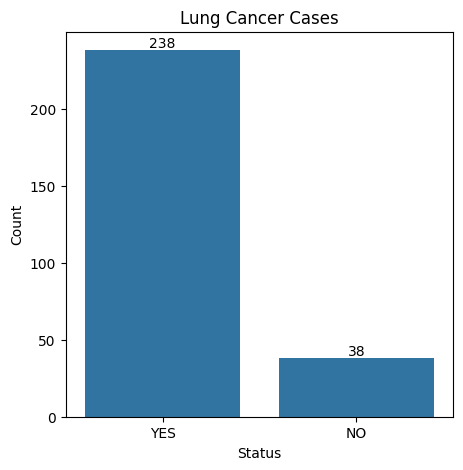

In [9]:
plt.figure(figsize=(5, 5))


ax = sns.countplot(x='LUNG_CANCER', data=df)
ax.set_title('Lung Cancer Cases')
ax.set_xlabel('Status')
ax.set_ylabel('Count')


for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count),(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom')

plt.show()

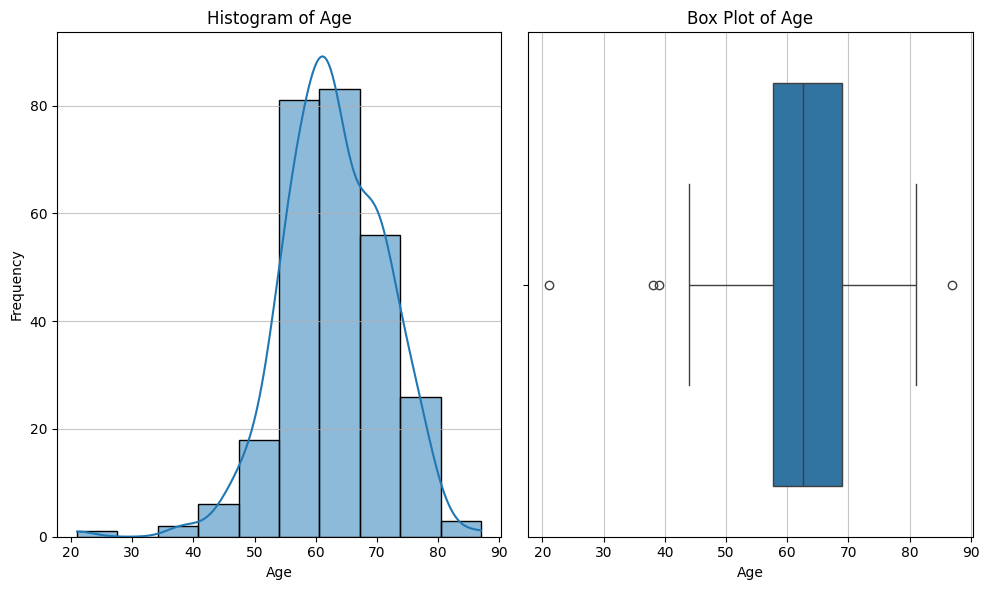

In [10]:
plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['AGE'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', alpha=0.7)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['AGE'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(visible=True, axis='x', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
binary_columns = df.select_dtypes(include=['int64']).columns
df[binary_columns] = df[binary_columns].replace({2: "YES", 1: "NO"})


df['GENDER'] = df['GENDER'].replace({'M': "Male", 'F': "Female"})
df.head()


categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("Categorical Columns:\n", categorical_columns)
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")

Categorical Columns:
 ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

Column: GENDER
Unique Values: ['Male' 'Female']

Column: SMOKING
Unique Values: ['NO' 'YES']

Column: YELLOW_FINGERS
Unique Values: ['YES' 'NO']

Column: ANXIETY
Unique Values: ['YES' 'NO']

Column: PEER_PRESSURE
Unique Values: ['NO' 'YES']

Column: CHRONIC DISEASE
Unique Values: ['NO' 'YES']

Column: FATIGUE 
Unique Values: ['YES' 'NO']

Column: ALLERGY 
Unique Values: ['NO' 'YES']

Column: WHEEZING
Unique Values: ['YES' 'NO']

Column: ALCOHOL CONSUMING
Unique Values: ['YES' 'NO']

Column: COUGHING
Unique Values: ['YES' 'NO']

Column: SHORTNESS OF BREATH
Unique Values: ['YES' 'NO']

Column: SWALLOWING DIFFICULTY
Unique Values: ['YES' 'NO']

Column: CHEST PAIN
Unique Values: ['YES' 'NO']

Column: LUNG_CANCER
Unique Values: ['YES' 'NO'

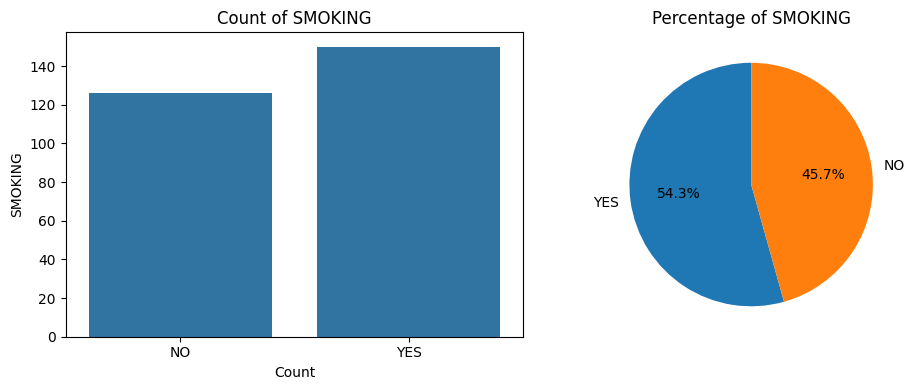

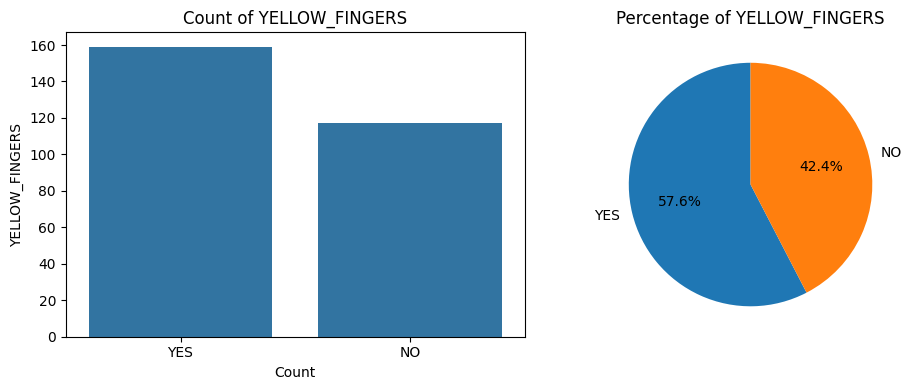

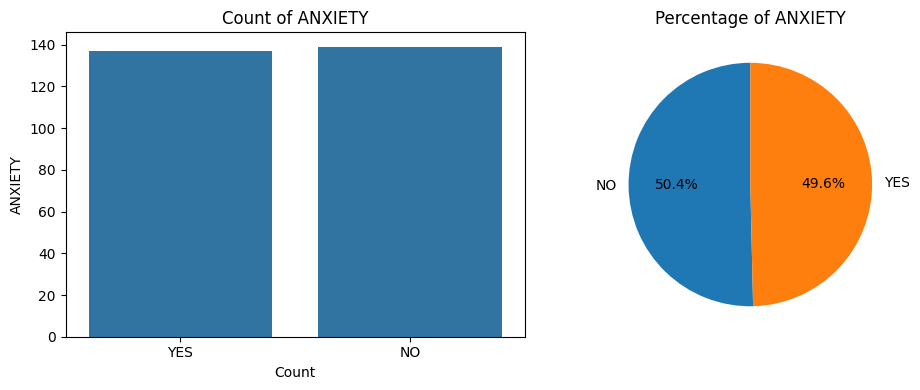

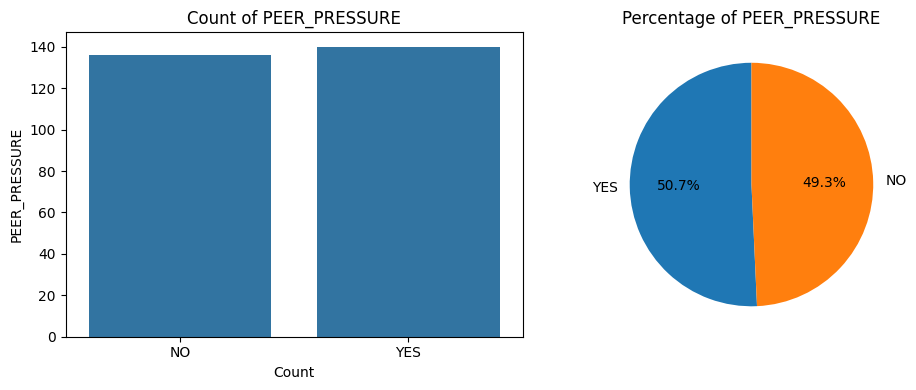

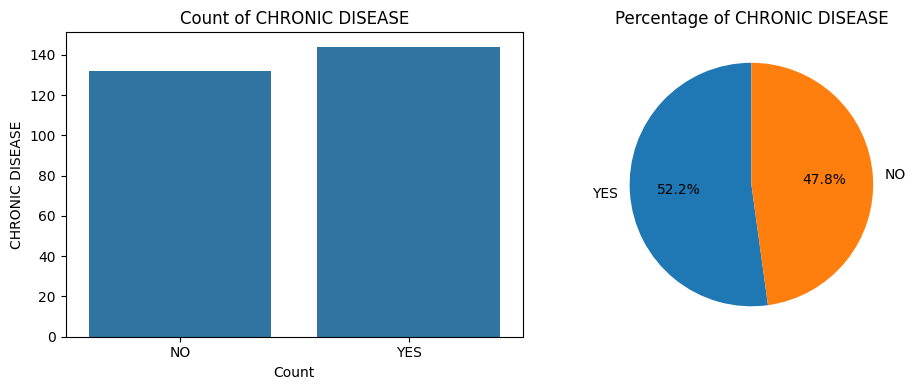

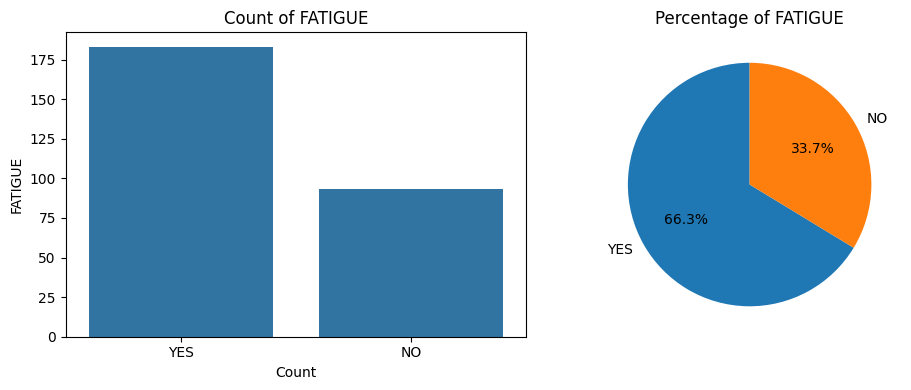

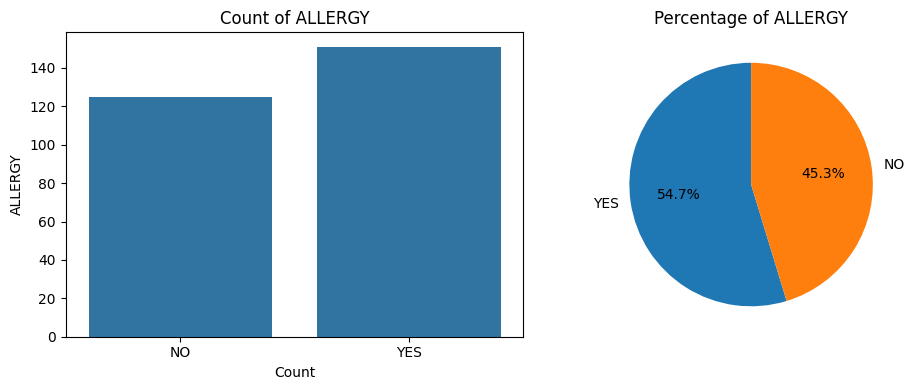

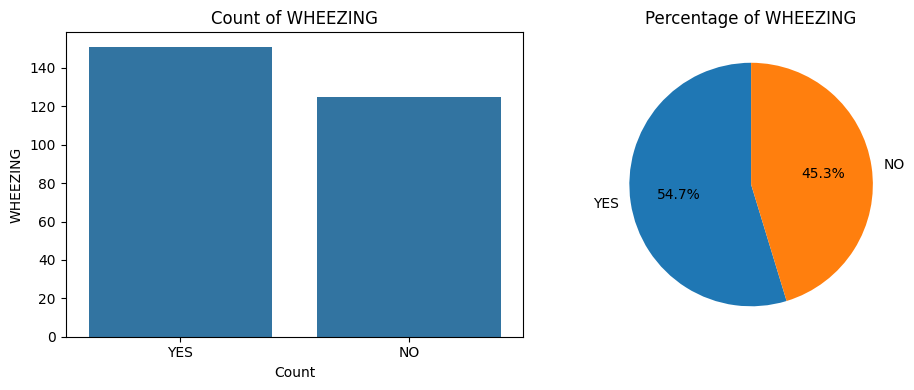

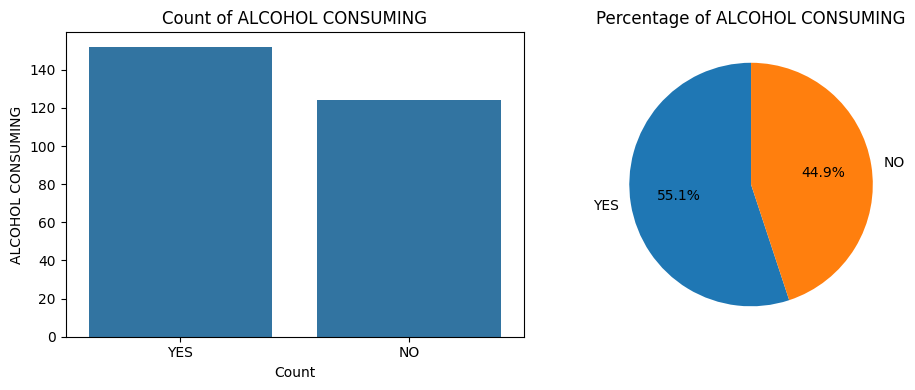

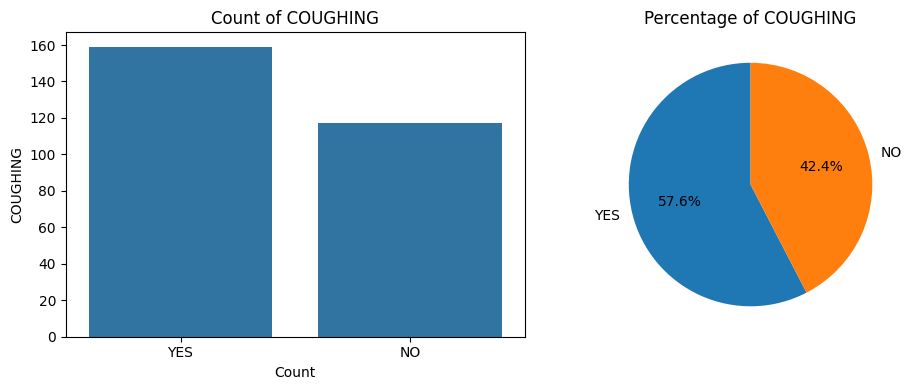

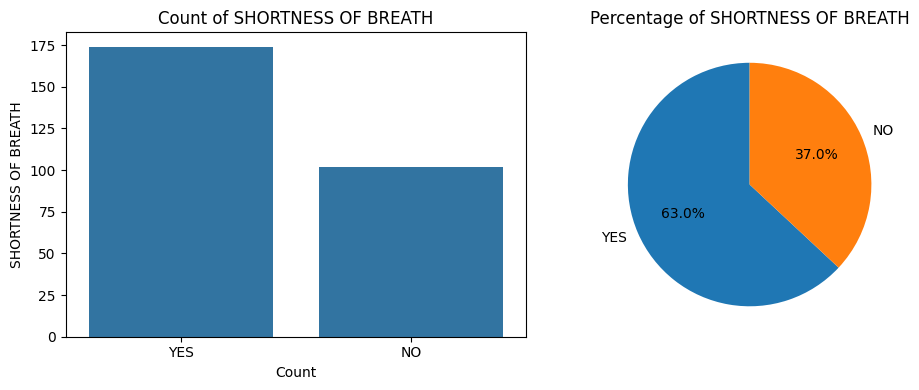

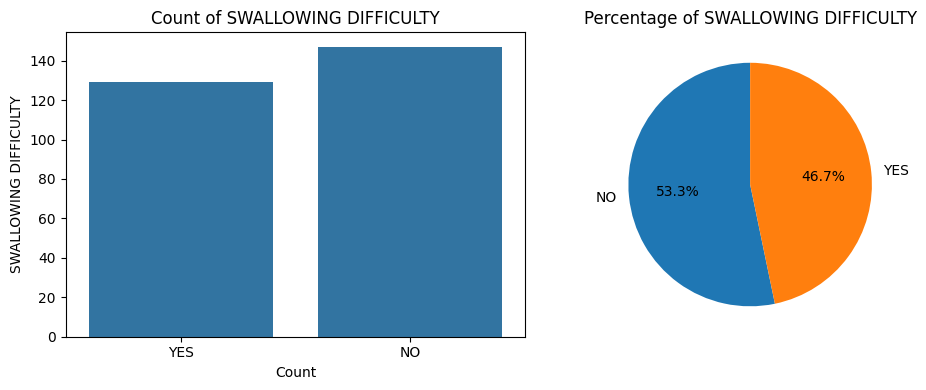

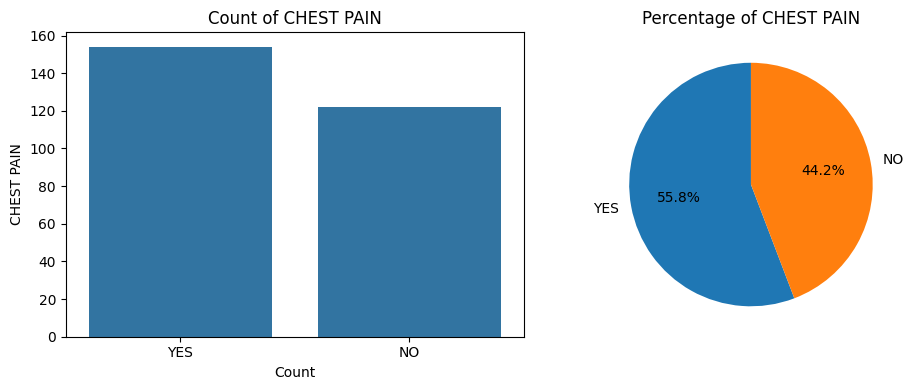

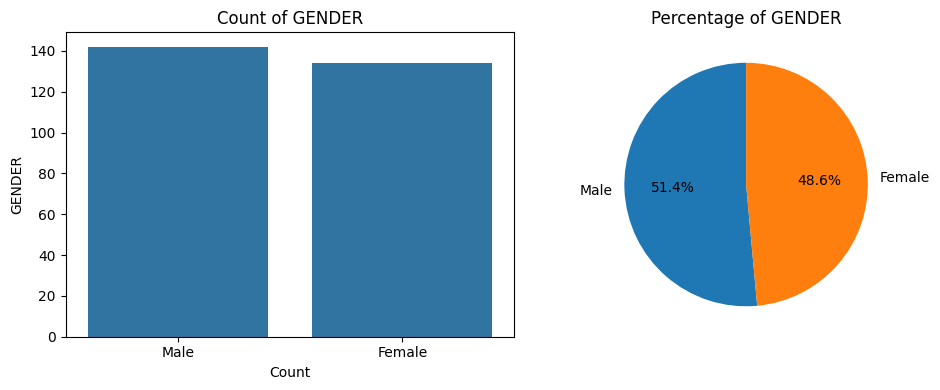

In [12]:
df.columns = df.columns.str.strip()

def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))


    plt.subplot(1, 2, 1)
    sns.countplot(x=column_name, data=data)
    plt.title(f'Count of {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)


    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
    plt.title(f'Percentage of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()


categorical_features = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER'
]

for feature in categorical_features:
    plot_categorical_distribution(feature)

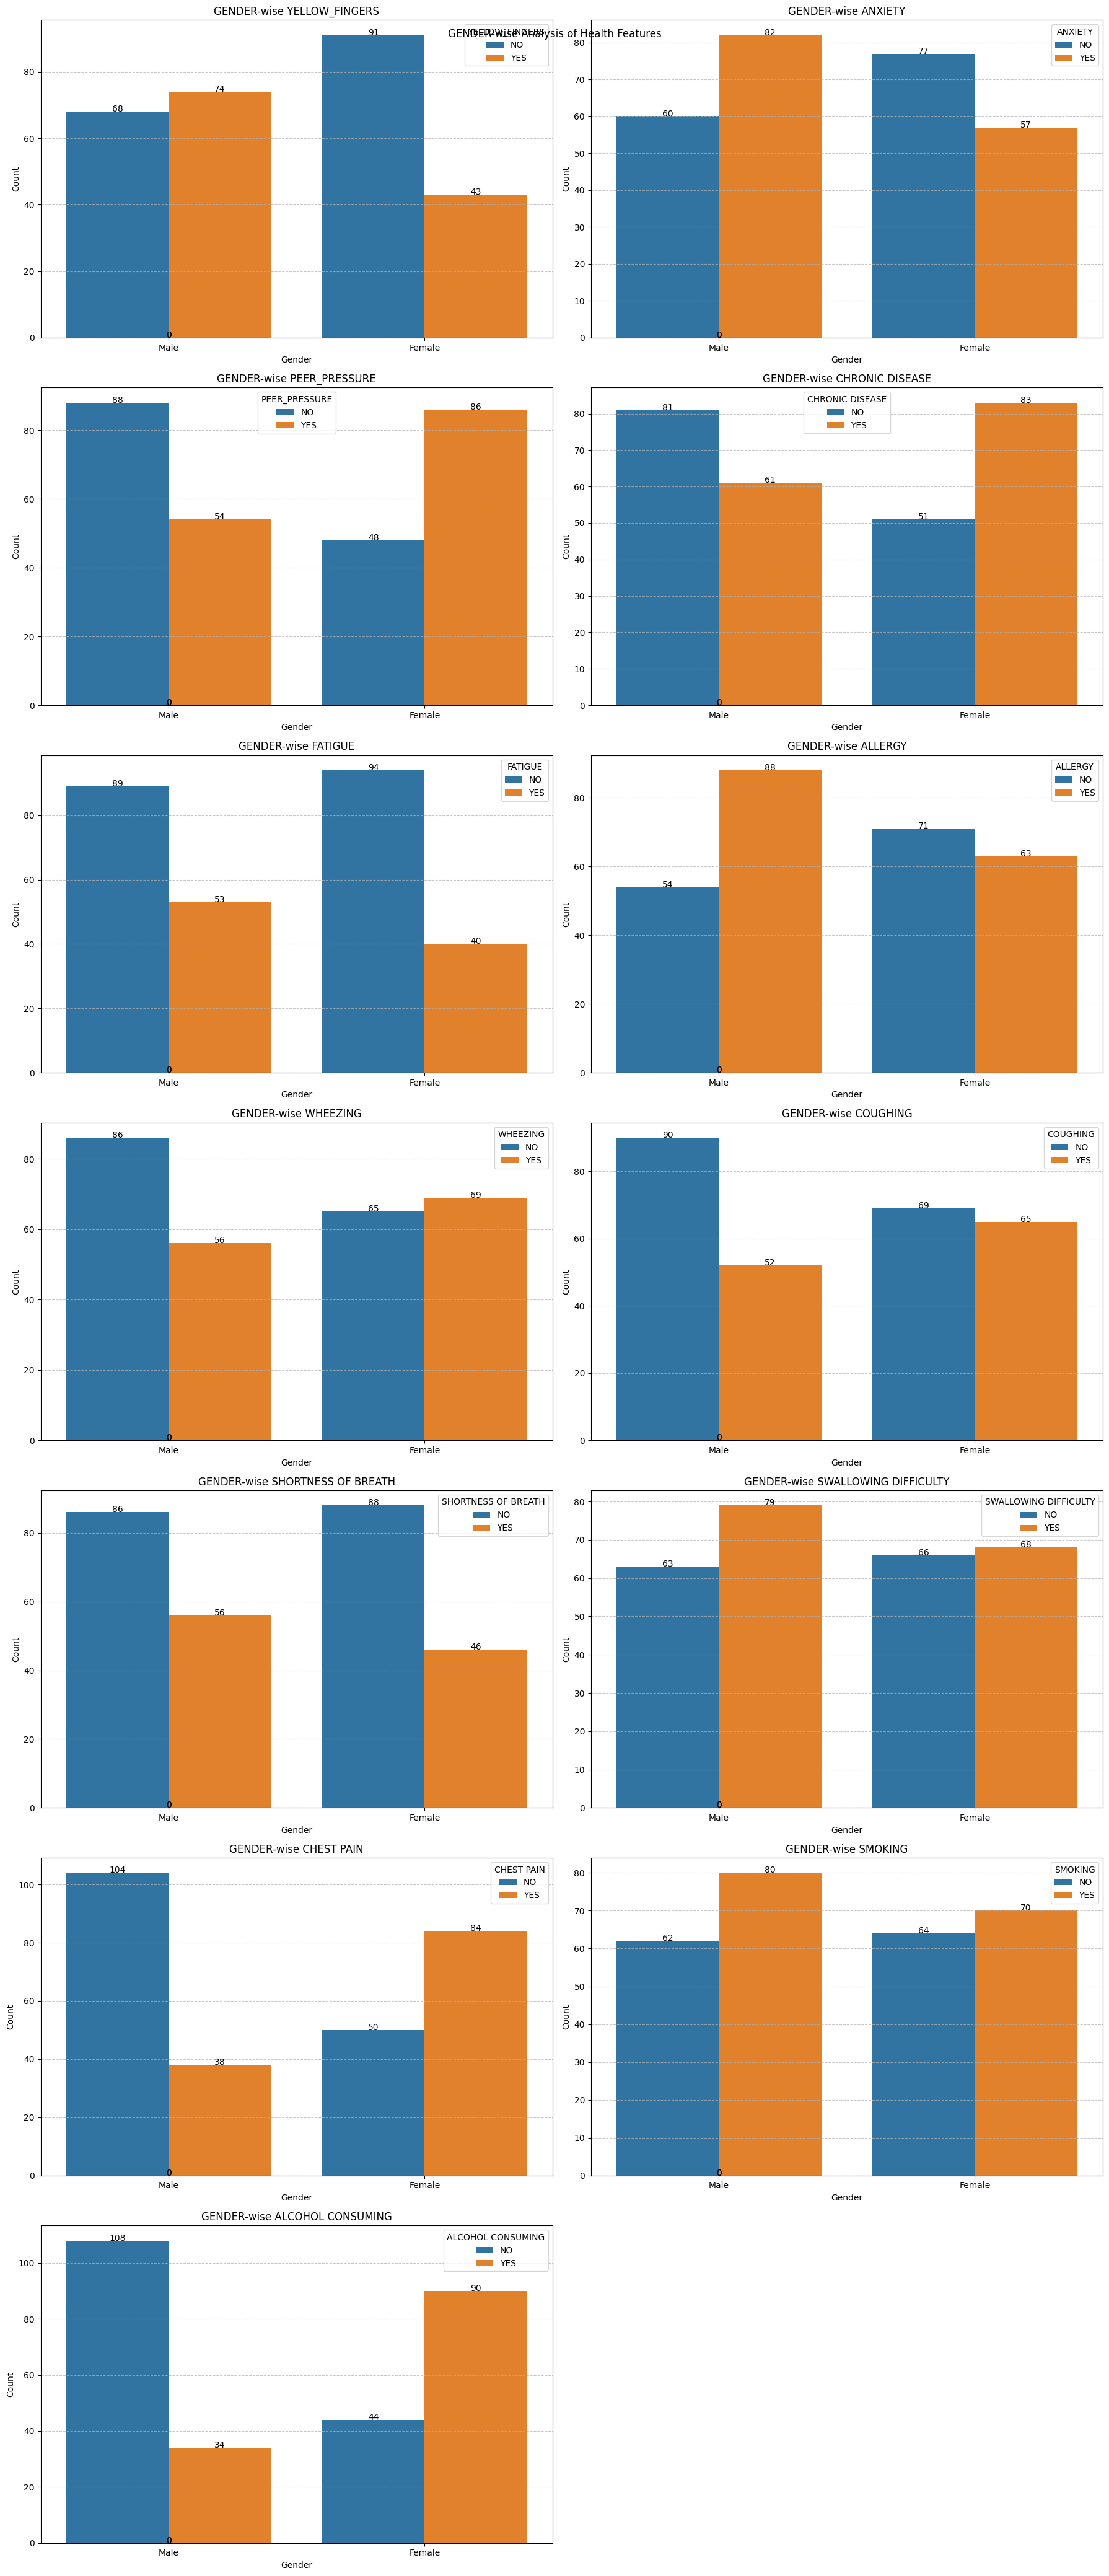

In [13]:
df.columns = df.columns.str.strip()

features = [
    'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE','FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN','SMOKING','ALCOHOL CONSUMING'
]

num_features = len(features)
rows = (num_features + 2) // 2
fig, axes = plt.subplots(rows, 2, figsize=(18, 6 * rows))
fig.suptitle("GENDER-wise Analysis of Health Features")
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.countplot(data=df, x='GENDER', hue=feature, ax=axes[i])
    axes[i].set_title(f"GENDER-wise {feature}")
    axes[i].set_xlabel("Gender")
    axes[i].set_ylabel("Count")
    axes[i].legend(title=feature, labels=['NO', 'YES'])
    axes[i].grid(visible=True, axis='y', linestyle='--', alpha=0.7)


    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

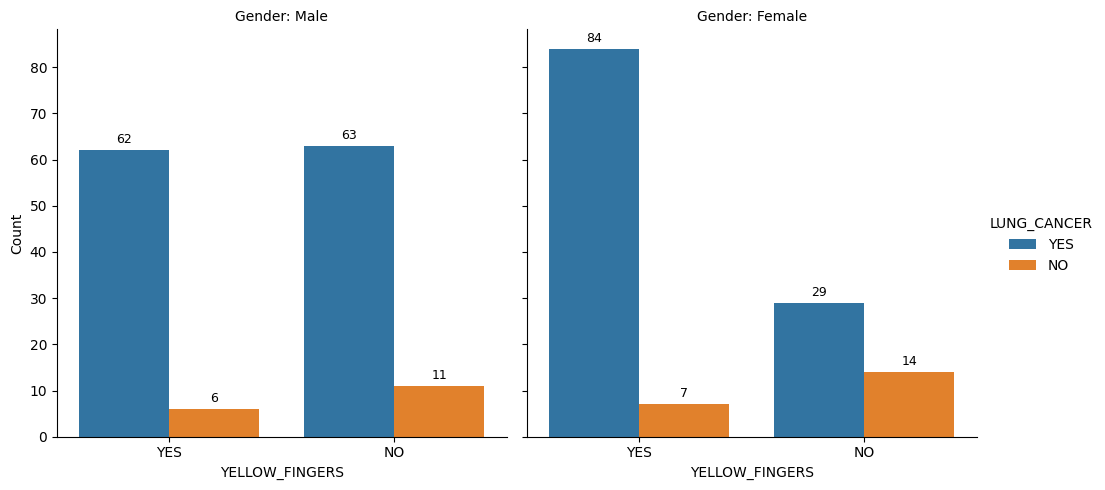

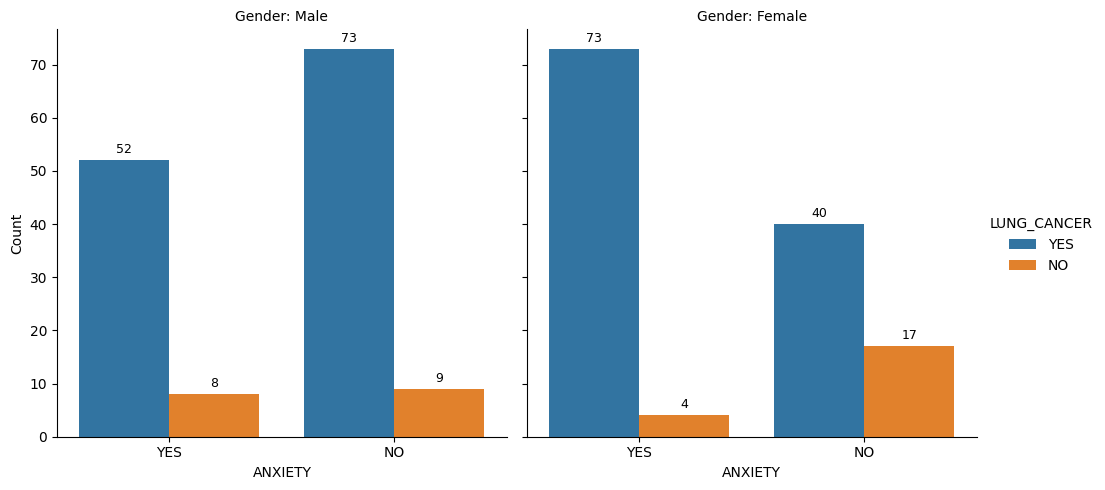

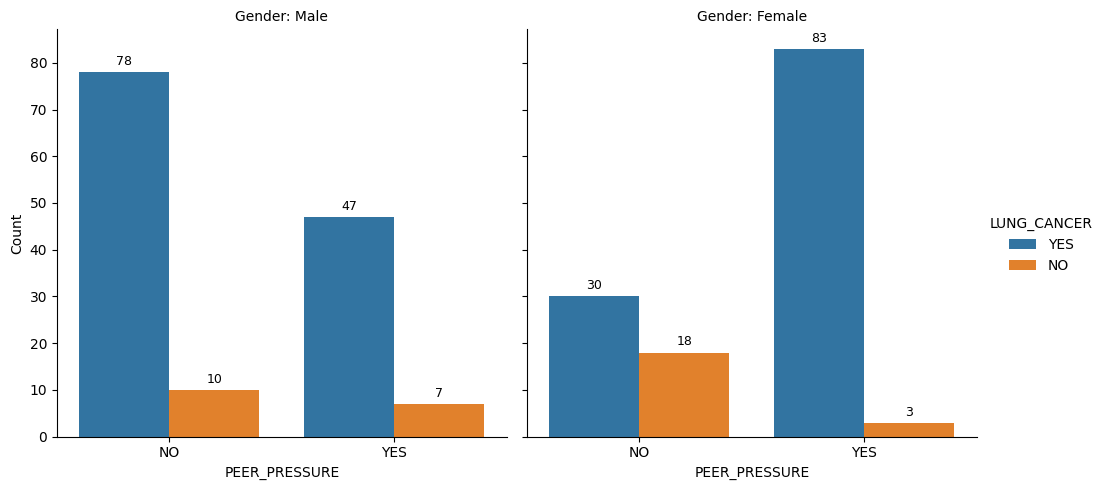

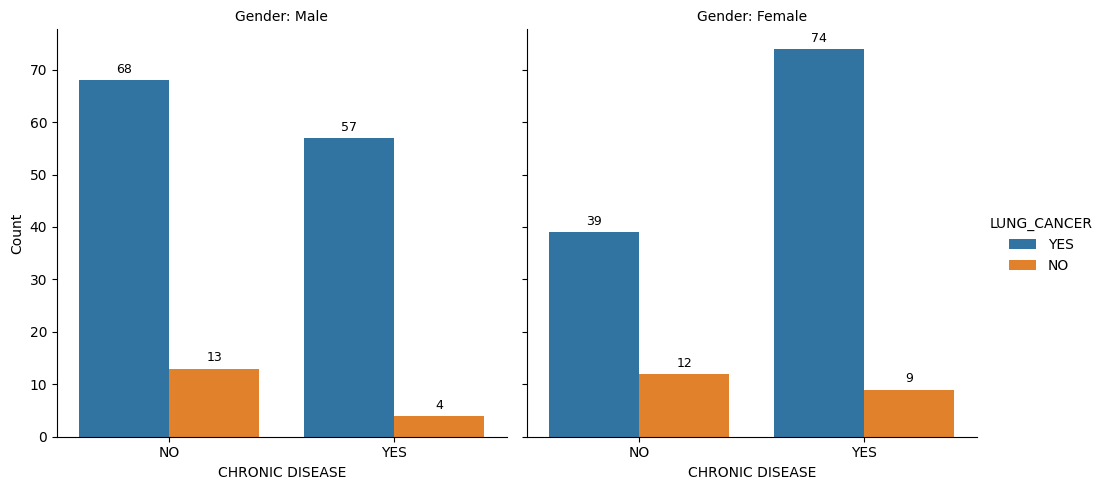

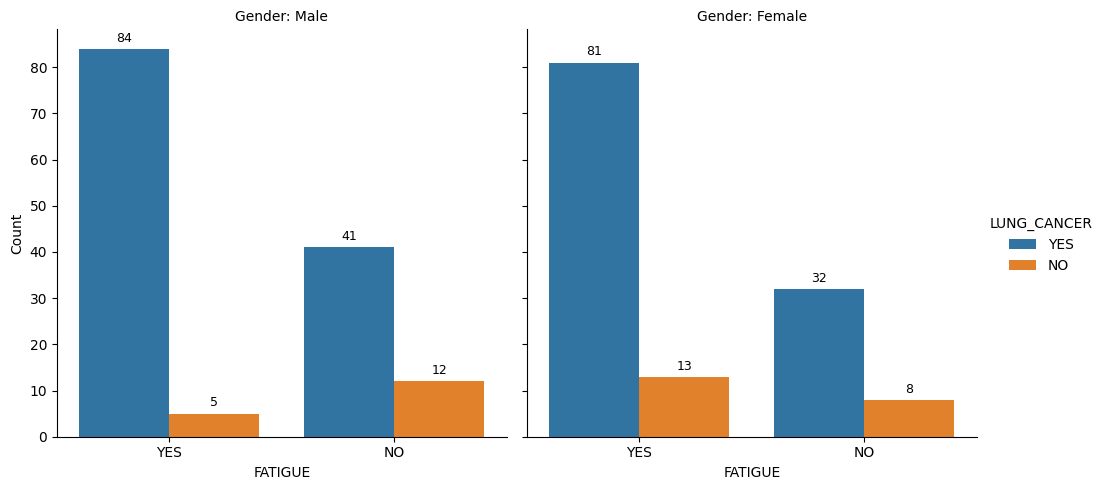

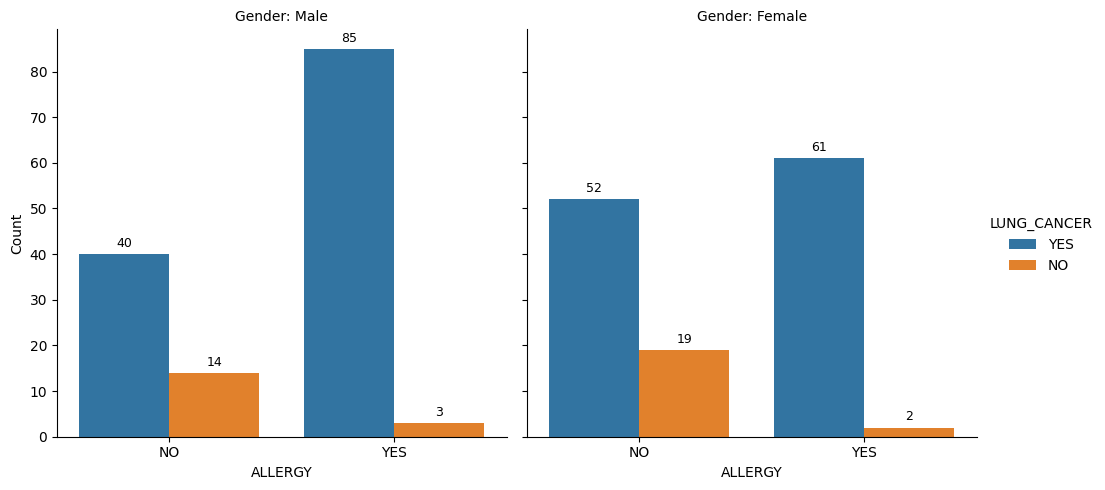

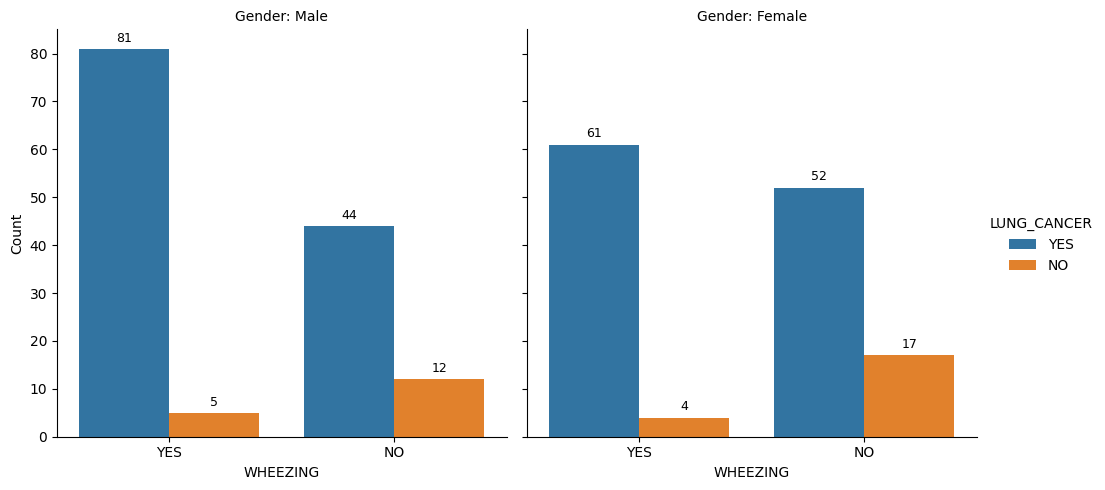

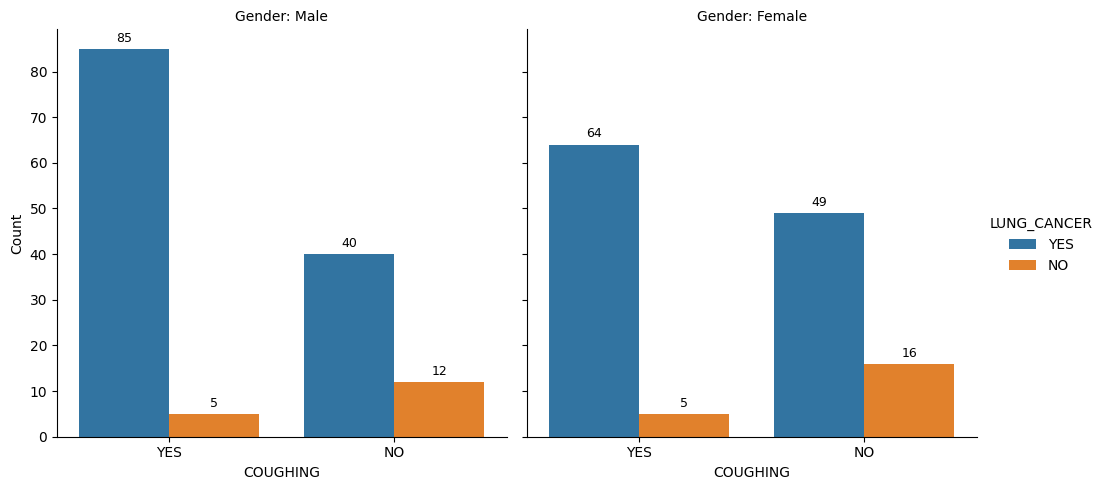

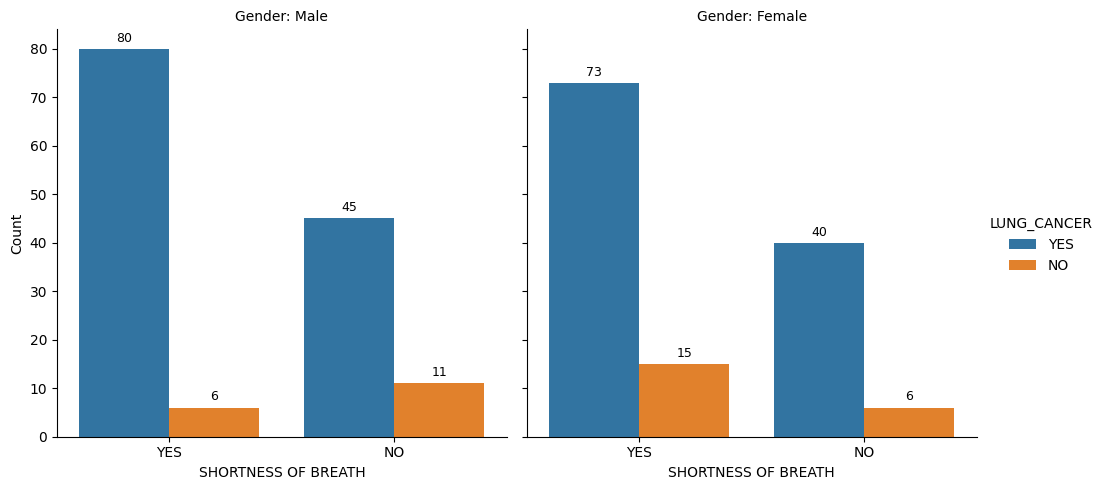

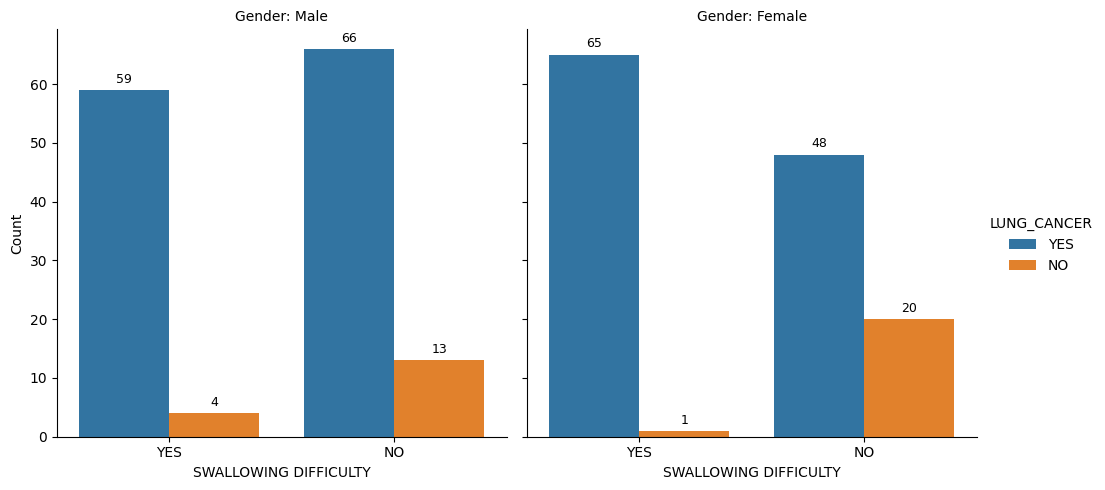

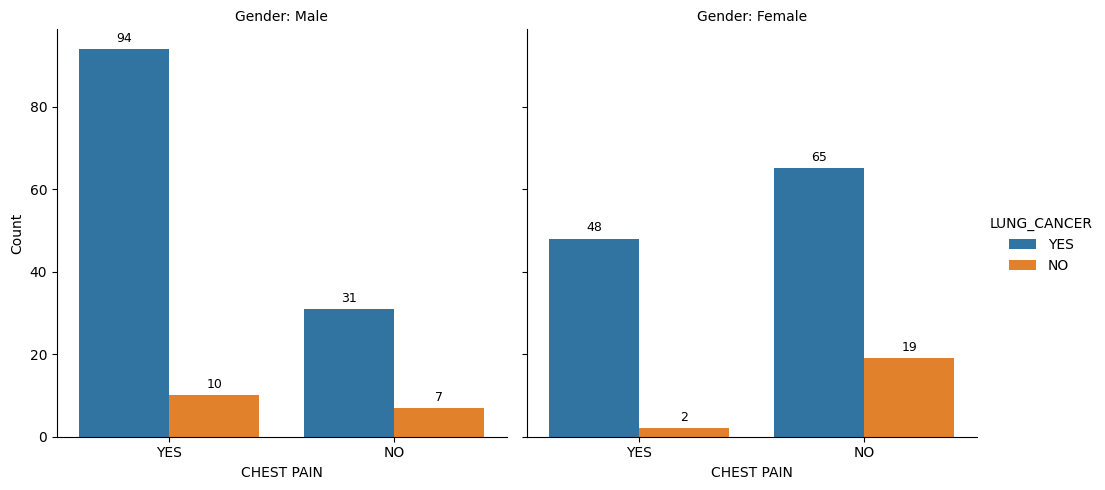

In [14]:
def gender_wise_feature_analysis(feature, data=df):
    g = sns.catplot(data=data,x=feature,hue='LUNG_CANCER',col='GENDER',kind='count')

    g.set_axis_labels(f"{feature}", "Count")
    g.set_titles("Gender: {col_name}")

    for ax in g.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=9,
                            xytext=(0, 3), textcoords='offset points')

    plt.show()


df.columns = df.columns.str.strip()


features = [
    'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

for feature in features:
    gender_wise_feature_analysis(feature, df)


In [15]:
df.columns = df.columns.str.strip()

encoding_map = {
    'Male': 1, 'Female': 0,
    'YES': 1, 'NO': 0
}

categorical_columns = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
]

df_encoded = df.copy()
df_encoded[categorical_columns] = df_encoded[categorical_columns].replace(encoding_map)
df_encoded.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


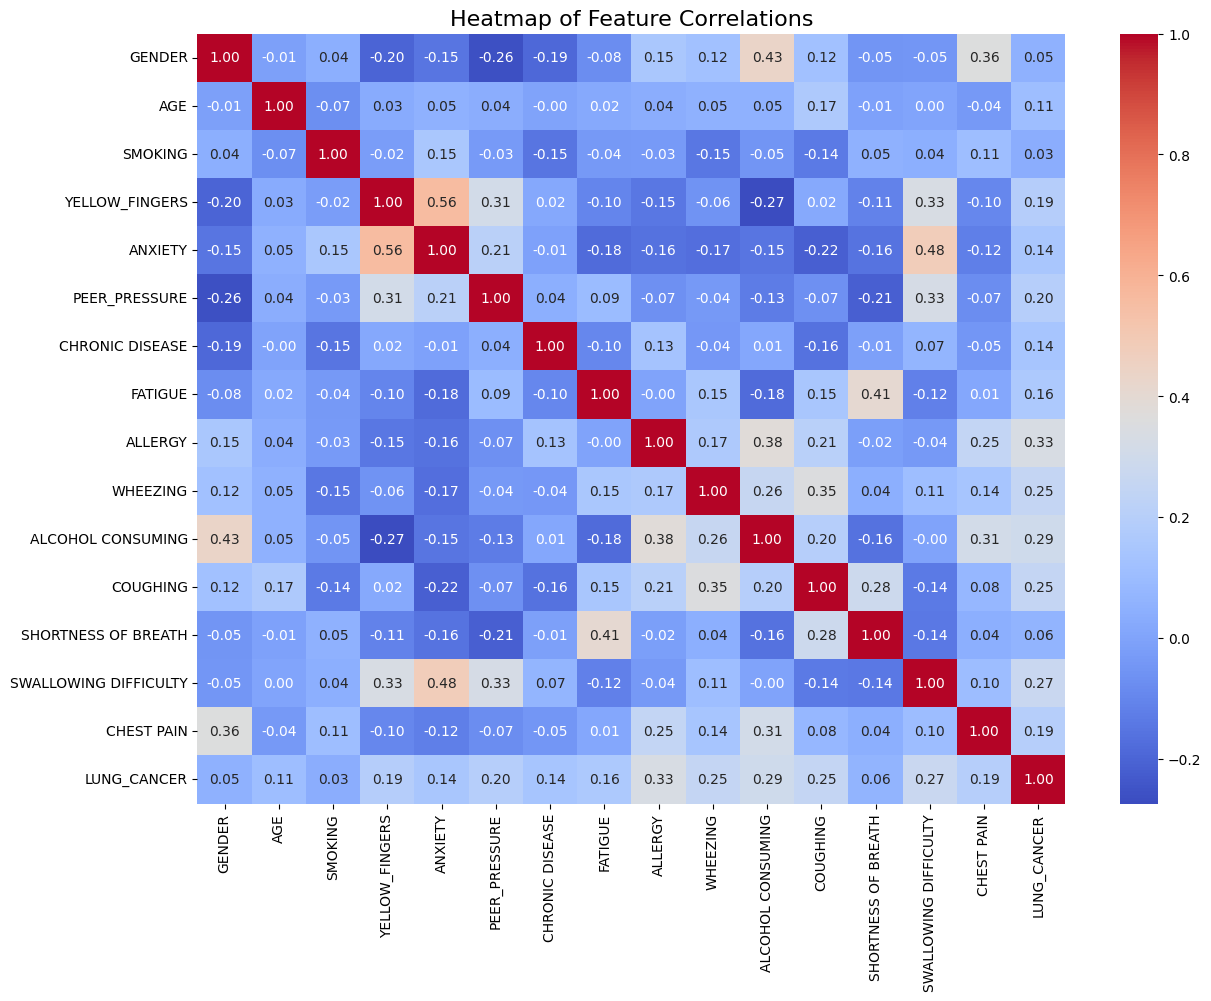

In [16]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()

In [17]:
df_encoded=df_encoded.drop(columns=['GENDER','SHORTNESS OF BREATH'])
df_encoded

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,0,1,1,1,0,0,1,1,0,1,1,0,1
280,59,1,0,0,0,1,1,1,0,0,0,0,0,0
281,55,1,0,0,0,0,1,1,0,0,0,0,1,0
282,46,0,1,1,0,0,0,0,0,0,0,1,1,0


In [18]:
df_encoded['CHEST PAIN_Alcohol'] = df_encoded['CHEST PAIN'] * df_encoded['ALCOHOL CONSUMING']
df_encoded['Wheezing_Coughing'] = df_encoded['WHEEZING'] * df_encoded['COUGHING']
df_encoded['ANXIETY_YELLOW_FINGERS']=df_encoded['ANXIETY']*df_encoded['YELLOW_FINGERS']

X = df_encoded.drop('LUNG_CANCER', axis=1)
y = df_encoded['LUNG_CANCER']

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [20]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

print("Original target distribution:")
print(y_train.value_counts())
print("\nResampled target distribution:")
print(pd.Series(y_train_resampled).value_counts())

Original target distribution:
LUNG_CANCER
1    194
0     26
Name: count, dtype: int64

Resampled target distribution:
LUNG_CANCER
1    194
0    194
Name: count, dtype: int64


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
print("Model initialized: K-Nearest Neighbors")

Model initialized: K-Nearest Neighbors


Training and Evaluating Model: K-Nearest Neighbors


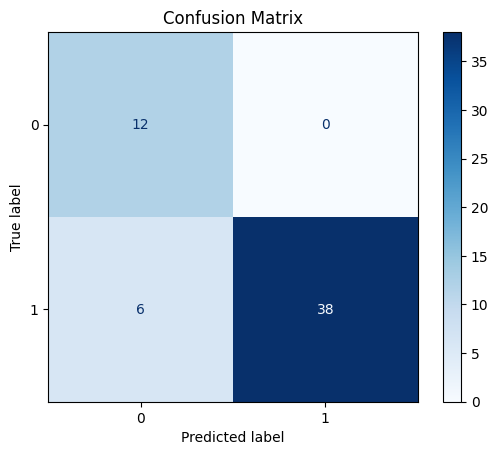

Accuracy: 0.8929


0.8928571428571429

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_knn_model(model, X_train, X_test, y_train, y_test):
    print(f"Training and Evaluating Model: K-Nearest Neighbors")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    print(f"Accuracy: {accuracy:.4f}")
    return accuracy

evaluate_knn_model(knn_model, X_train_resampled, X_val_scaled, y_train_resampled, y_val)
